# IT'S CLASSIFICATION FOLKS!

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [X] Determine whether your problem is regression or classification.
- [X] Choose your evaluation metric. (can be complex or not, probably not too complex)
- [X] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [X] Begin to clean and explore your data. (keyword: begin)
- [ ] Choose which features, if any, to exclude. Would some features "leak" information from the future? (try to do as much as you can today)

## Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [1]:
import sys, getpass
a = getpass.getuser()
### example appending of folder
sys.path.append('/home/{}/Code/Github-Repos/BFLibrary/'.format(a))

In [2]:
#from BFLibrary import ACompass, BWarp, CToolbox 
import AMap as am
import BCook as bc
import CTools as ct

Good site to see what's happening: https://coralreefwatch.noaa.gov/satellite/index.php

Where I downloaded this data: http://www.reefbase.org/gis_maps/datasets.aspx

In [3]:
import pandas as pd

df = pd.read_excel('../../CoralBleaching.xlsm')

In [16]:
df.head(3)

ID REGION SUBREGION COUNTRY               LOCATION    LAT    LON  MONTH  \
0  7067    NaN       NaN  France     Hermitage, Reunion -21.22  55.22    4.0   
1  7068    NaN       NaN  France  Saint Gilles, Reunion -21.05  55.23    7.0   
2  7069    NaN       NaN  France     Saint-Leu, Reunion -21.16  55.28    2.0   

   YEAR DEPTH     ...       RECOVERY_CODE RECOVERY          SURVEY_TYPE  \
0  2008     6     ...                 NaN      NaN  Reef Check Protocol   
1  2008   6.5     ...                 NaN      NaN  Reef Check Protocol   
2  2008     6     ...                 NaN      NaN  Reef Check Protocol   

  SURVEY_AREA WATER_TEMPERATURE OTHER_FACTORS  \
0         NaN               NaN           NaN   
1         NaN               NaN           NaN   
2         NaN               NaN           NaN   

                                             REMARKS  \
0  0% of recorded Recently killed coral on substr...   
1  0% of recorded Recently killed coral on substr...   
2  0% of recorded Recently killed coral on substr...   

                                              SOURCE  REFERENCE_CODE  \
0  Reef Check, Submitted by Harold Cambert. Site ...             NaN   
1  Reef Check, Submitted by Harold Cambert. Site ...             NaN   
2  Reef Check, Submitted by Harold Cambert . Site...             NaN   

  COUNTRY_CODE  
0          FRA  
1          FRA  
2          FRA  

[3 rows x 28 columns]

In [11]:
import pandas_profiling
df.profile_report()

In [13]:
!cat ../../bleaching_data_description.txt

ReefBase Dataset: CORAL BLEACHING

DATASET DESCRIPTION:
The ReefBase Coral Bleaching dataset provides observation details of coral bleaching
occurrences (or lack thereof) around the world. This dataset was build upon an original
bleaching database developed at UNEP-WCMC, and has been maintained and updated
regularly by ReefBase since early 2002. Main sources of information for this dataset
have been: published records from the literature, postings on the coral-list
(http://www.coral.noaa.gov/lists/), the ReefBase online Bleaching Report
(http://www.reefbase.org/contribute/bleachingreport.aspx), and through collaborations
with numerous institutions and individuals. ReefBase would like to particularly acknowledge
the contributions made by: National Oceanographic and Atmospheric Administration (NOAA),
Australian Institute of Marine Science (AIMS), and Great Barrier Reef Marine Park Authority (GBRMPA).
YOU CAN HELP US MAINTAIN THE CORAL BLEACHING DATABASE, BY USING OUR ONLINE
BLEACHING REP

In [18]:
### Hmmm for target...I think I want to do Bleaching_Severity
target = 'BLEACHING_SEVERITY'

In [97]:
"""from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2,
                               stratify=df[target], random_state=4)
""";
# I need to split this dataset into train below a certain time and/test from above a 
# certain amount of time.
df.sort_values('YEAR',inplace=True)
pd.value_counts(df.YEAR,sort=False).sort_index()

1963       1
1969       2
1973       1
1976       1
1977       1
1979       6
1980      11
1981       2
1982      20
1983      48
1984       2
1985       3
1986      12
1987      86
1988       2
1989       4
1990      11
1991      13
1992      46
1993      11
1994      97
1995      27
1996      21
1997      44
1998    2054
1999     177
2000     170
2001     213
2002     824
2003     257
2004     297
2005     668
2006     298
2007     124
2008     140
2009     188
2010     205
2011      63
2012      40
Name: YEAR, dtype: int64

In [101]:
df.shape[0]*0.20
### Maybe take everything after 2005 as test.
mask = (df['YEAR'] > 2005)
test = df[mask]
train = df[~mask]

In [98]:
df.shape

(6190, 28)

In [103]:
test.shape, train.shape

((1058, 28), (5132, 28))

# Okay, I think I'm choosing bleaching severity.

### I want to predict if the coral is going to bleach based on area probably...

In [106]:
features, num_feats, cat_feats = bc.allPantryFeatures(train)

In [107]:
print("Numerical Features:{}\n\nCategorical Features:{}".format(num_feats, cat_feats))

Numerical Features:['ID', 'LAT', 'LON', 'MONTH', 'YEAR', 'SEVERITY_CODE', 'MORTALITY_CODE', 'RECOVERY_CODE', 'REFERENCE_CODE']

Categorical Features:['REGION', 'SUBREGION', 'COUNTRY', 'LOCATION', 'DEPTH', 'BLEACHING_SEVERITY', 'CORAL_FAMILY', 'CORAL_SPECIES', 'PERCENTAGE_AFFECTED', 'BLEACHING_DURATION', 'MORTALITY', 'RECOVERY', 'SURVEY_TYPE', 'SURVEY_AREA', 'WATER_TEMPERATURE', 'OTHER_FACTORS', 'REMARKS', 'SOURCE', 'COUNTRY_CODE']


In [108]:
### Before I move onto features entirely let's get baseline for classification.
bc.baseSouplineModel(train,target,1)

Classification
Low                 0.251169
No Bleaching        0.220966
HIGH                0.205768
Severity Unknown    0.163679
Medium              0.158418
Name: BLEACHING_SEVERITY, dtype: float64


For severity unknown, bleaching has occured but the damage is just unknown. It certainly can't be high because the damage would be extensive enough to note, so maybe I can replace it with medium or low.

In [109]:
### Let's now drop some column with almost 85% missing values.

train_clean = pd.DataFrame()

for col in train:
    if train[col].isna().mean()*100 < 40:
        #print(train[col].isna().mean())
        train_clean[col] = train[col]

train_clean.profile_report()

In [110]:
train.shape,train_clean.shape

((5132, 28), (5132, 13))

In [111]:
train_clean.head()

ID    REGION                  SUBREGION        COUNTRY  \
1759  2258  Americas         Northern Caribbean        Jamaica   
1882  2072  Americas  Southern Tropical America       Colombia   
2276  2276  Americas             U.S. Caribbean    Puerto Rico   
2199  2361  Americas             U.S. Caribbean  Florida (USA)   
1980  1817  Americas  Southern Tropical America         Panama   

                                        LOCATION        LAT        LON  MONTH  \
1759                                     Jamaica  18.200000 -77.250000    NaN   
1882  Providencia Island ( Isla de Providencia )  13.358333 -81.383333    NaN   
2276                                 Puerto Rico  17.866667 -66.433333    NaN   
2199                           Middle Sambo Reef  24.490000 -81.675000    NaN   
1980         Chiriqui Gulf ( Golfo de Chiriqui )   8.000000 -82.333333    NaN   

      YEAR  SEVERITY_CODE BLEACHING_SEVERITY    SOURCE COUNTRY_CODE  
1759  1963             -1   Severity Unknown  ReefBase          JAM  
1882  1969             -1   Severity Unknown  ReefBase          COL  
2276  1969             -1   Severity Unknown  ReefBase          PRI  
2199  1973              2             Medium  ReefBase      USA_FLO  
1980  1976             -1   Severity Unknown  ReefBase          PAN

In [112]:
pd.value_counts(train_clean.LOCATION.values,sort=True).head(10)

No Name                                                               233
U/N Reef                                                              188
Paso Lagrimas, Pez Maya, Reserva de la Biosfera de Sian Ka'an          75
San Miguel de Ruiz, Pez Maya, Reserva de la Biosfera de Sian Ka'an     59
Punta Xamach, Pez Maya, Reserva de la Biosfera de Sian Ka'an           47
Punta San Juan, Pez Maya, Reserva de la Biosfera de Sian Ka'an         47
Las Llamaradas, Mahahual                                               46
Paso Juana, Pez Maya, Reserva de la Biosfera de Sian Ka'an             46
Río Bermejo, Mahahual                                                  43
Los Escalones, Mahahual                                                38
dtype: int64

In [114]:
bc.baseSouplineModel(train,target,1)

Classification
Low                 0.251169
No Bleaching        0.220966
HIGH                0.205768
Severity Unknown    0.163679
Medium              0.158418
Name: BLEACHING_SEVERITY, dtype: float64


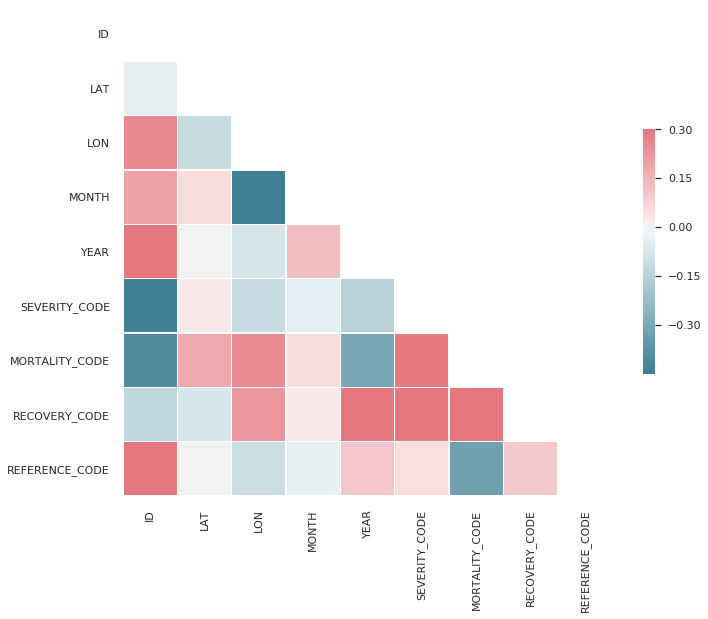

In [117]:
am.heatSeeker(df)

In [121]:
#am.plotFeatures(train,target, num_feats, cat_feats)
train.dtypes

ID                       int64
REGION                  object
SUBREGION               object
COUNTRY                 object
LOCATION                object
LAT                    float64
LON                    float64
MONTH                  float64
YEAR                     int64
DEPTH                   object
SEVERITY_CODE            int64
BLEACHING_SEVERITY      object
CORAL_FAMILY            object
CORAL_SPECIES           object
PERCENTAGE_AFFECTED     object
BLEACHING_DURATION      object
MORTALITY_CODE         float64
MORTALITY               object
RECOVERY_CODE          float64
RECOVERY                object
SURVEY_TYPE             object
SURVEY_AREA             object
WATER_TEMPERATURE       object
OTHER_FACTORS           object
REMARKS                 object
SOURCE                  object
REFERENCE_CODE         float64
COUNTRY_CODE            object
dtype: object